In [1]:
import numpy as np
import pandas as pd

PRE-PROCESSING

In [2]:
# Read the data
df=pd.read_csv('Fraud.csv')
# Shape the data
df.shape

(6362620, 11)

In [3]:
# Get head of the data
df.head(200)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
195,1,CASH_OUT,210370.09,C2121995675,0.0,0.00,C1170794006,1442298.03,22190.99,0,0
196,1,CASH_OUT,36437.06,C2120063568,0.0,0.00,C1740000325,154606.00,1363368.51,0,0
197,1,CASH_OUT,82691.56,C1620409359,0.0,0.00,C248609774,657983.89,6453430.91,0,0
198,1,CASH_OUT,338767.10,C691691381,0.0,0.00,C453211571,544481.28,3461666.05,0,0


Data cleaning

In [4]:
# Check for null values
df.isnull().values.any()

False

In [5]:
# Getting information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


This is a really big dataset with no NULL values.

In [6]:
legit = len(df[df.isFraud == 0])
fraud = len(df[df.isFraud == 1])
legit_percent = (legit / (fraud + legit)) * 100
fraud_percent = (fraud / (fraud + legit)) * 100

print("Number of Legit transactions: ", legit)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Legit transactions: {:.4f} %".format(legit_percent))
print("Percentage of Fraud transactions: {:.4f} %".format(fraud_percent))

Number of Legit transactions:  6354407
Number of Fraud transactions:  8213
Percentage of Legit transactions: 99.8709 %
Percentage of Fraud transactions: 0.1291 %


Given the highly imbalanced nature of the data (99.87% legitimate transactions and 0.13% fraudulent transactions), Decision Trees and Random Forests are indeed good choices for this problem. These tree-based models can handle imbalanced data well and are effective at capturing complex patterns and interactions in the data.
I will likely build an ensemble model using Random Forests, which combines multiple decision trees and averages their predictions. This ensemble approach can further improve the model's performance and robustness.

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

NUMBER OF LEGIT AND FRAUD TRANSACTIONS

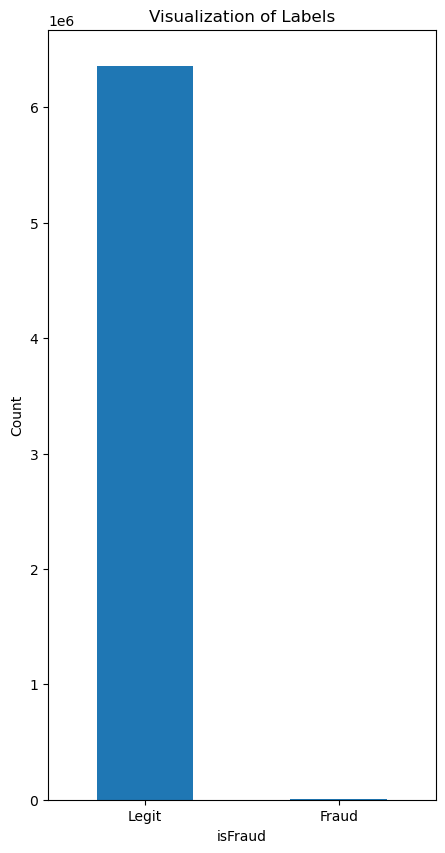

In [10]:
plt.figure(figsize=(5,10))
labels = ["Legit", "Fraud"]
count_classes = df.value_counts(df['isFraud'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

PROBLEM SOLVING

In [11]:
#creating a copy of original dataset to train and test models

new_df=df.copy()
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


LABEL ENCODING

In [12]:
# Checking how many attributes are dtype: object

objList = new_df.select_dtypes(include = "object").columns
print (objList)


Index(['type', 'nameOrig', 'nameDest'], dtype='object')


THERE ARE 3 ATTRIBUTES WITH Object Datatype. THUS WE NEED TO LABEL ENCODE THEM IN ORDER TO CHECK MULTICOLINEARITY.

In [13]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    new_df[feat] = le.fit_transform(new_df[feat].astype(str))

print (new_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 461.2 MB
None


In [14]:

new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


Multi-collinearity - I will calculate the Variance Inflation Factor (VIF) and create a correlation heatmap to identify highly correlated numerical features. If multi-collinearity is present, I will drop one of the correlated features

In [15]:
# Import library for VIF (VARIANCE INFLATION FACTOR)

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return(vif)

calc_vif(new_df)

,variables,VIF
0,step,2.791610
1,type,4.467405
2,amount,4.149312
3,nameOrig,2.764234
4,oldbalanceOrg,576.803777
5,newbalanceOrig,582.709128
6,nameDest,3.300975
7,oldbalanceDest,73.349937
8,newbalanceDest,85.005614
9,isFraud,1.195305


We can see that oldbalanceOrg and newbalanceOrig have too high VIF thus they are highly correlated. Similarly oldbalanceDest and newbalanceDest. Also nameDest is connected to nameOrig.

Thus combine these pairs of collinear attributes and drop the individual ones.

In [16]:
new_df['Actual_amount_orig'] = new_df.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
new_df['Actual_amount_dest'] = new_df.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
new_df['TransactionPath'] = new_df.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)

#Dropping columns
new_df = new_df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','nameOrig','nameDest'],axis=1)

calc_vif(new_df)

,variables,VIF
0,type,2.687803
1,amount,3.818902
2,isFraud,1.184479
3,isFlaggedFraud,1.002546
4,Actual_amount_orig,1.307910
5,Actual_amount_dest,3.754335
6,TransactionPath,2.677167


CORRELATION HEATMAP


<Axes: >

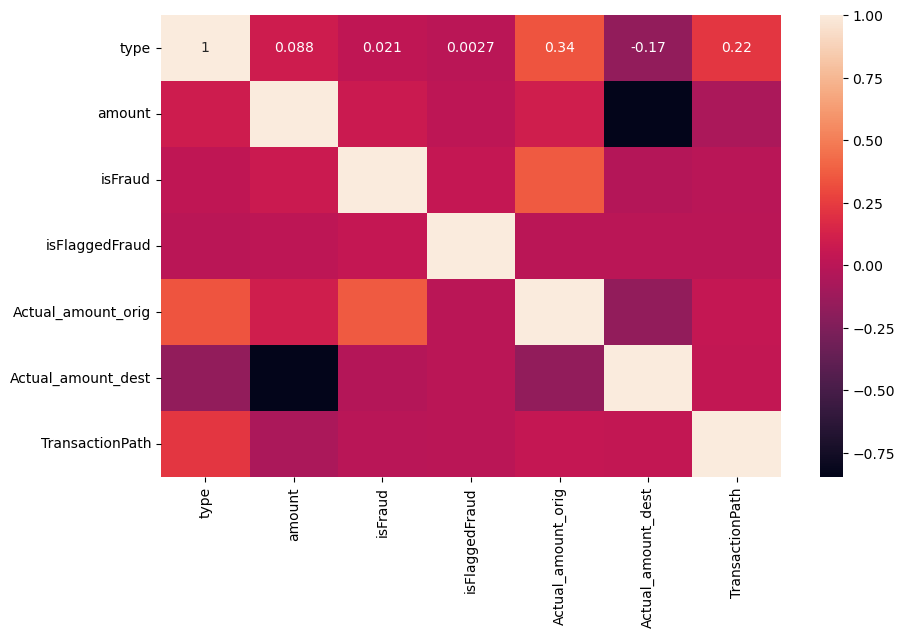

In [17]:
corr=new_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)


How did you select variables to be included in the model?
Calculate the Variance Inflation Factor (VIF) to identify multi-collinearity among numerical features.
Create a correlation heatmap to visualize the correlation between features and the target variable (isFraud).
Drop one of the highly correlated features with the target variable (isFraud) while retaining the feature that is more correlated with the target.

MODEL BUILDING

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import itertools
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

NORMALIZING (SCALING) AMOUNT

In [19]:
# Perform Scaling
scaler = StandardScaler()
new_df["NormalizedAmount"] = scaler.fit_transform(new_df["amount"].values.reshape(-1, 1))
new_df.drop(["amount"], inplace= True, axis= 1)

Y = new_df["isFraud"]
X = new_df.drop(["isFraud"], axis= 1)

I did not normalize the complete dataset because it may lead to decrease in accuracy of model.

TRAIN-TEST SPLIT

In [20]:
# Split the data
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (4453834, 6)
Shape of X_test:  (1908786, 6)


MODEL TRAINIG

In [21]:
# DECISION TREE

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred_dt = decision_tree.predict(X_test)
decision_tree_score = decision_tree.score(X_test, Y_test) * 100

In [22]:
# RANDOM FOREST

random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train, Y_train)

Y_pred_rf = random_forest.predict(X_test)
random_forest_score = random_forest.score(X_test, Y_test) * 100

EVALUATION

In [23]:
# Print scores of our classifiers

print("Decision Tree Score: ", decision_tree_score)
print("Random Forest Score: ", random_forest_score)

Decision Tree Score:  99.92377353983107
Random Forest Score:  99.95887438403257


In [24]:
# key terms of Confusion Matrix - DT

print("TP,FP,TN,FN - Decision Tree")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_dt).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

print("----------------------------------------------------------------------------------------")

# key terms of Confusion Matrix - RF

print("TP,FP,TN,FN - Random Forest")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_rf).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

TP,FP,TN,FN - Decision Tree
True Positives: 1717
False Positives: 737
True Negatives: 1905614
False Negatives: 718
----------------------------------------------------------------------------------------
TP,FP,TN,FN - Random Forest
True Positives: 1713
False Positives: 63
True Negatives: 1906288
False Negatives: 722



TP(Decision Tree) ~ TP(Random Forest) so no competetion here.
FP(Decision Tree) >> FP(Random Forest) - Random Forest has an edge
TN(Decision Tree) < TN(Random Forest) - Random Forest is better here too
FN(Decision Tree) ~ FN(Random Forest)


Here Random Forest looks good.

In [25]:
# confusion matrix - DT

confusion_matrix_dt = confusion_matrix(Y_test, Y_pred_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt,)

print("----------------------------------------------------------------------------------------")

# confusion matrix - RF

confusion_matrix_rf = confusion_matrix(Y_test, Y_pred_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

Confusion Matrix - Decision Tree
[[1905614     737]
 [    718    1717]]
----------------------------------------------------------------------------------------
Confusion Matrix - Random Forest
[[1906288      63]
 [    722    1713]]


In [26]:
# classification report - DT

classification_report_dt = classification_report(Y_test, Y_pred_dt)
print("Classification Report - Decision Tree")
print(classification_report_dt)

print("----------------------------------------------------------------------------------------")

# classification report - RF

classification_report_rf = classification_report(Y_test, Y_pred_rf)
print("Classification Report - Random Forest")
print(classification_report_rf)

Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.70      0.71      0.70      2435

    accuracy                           1.00   1908786
   macro avg       0.85      0.85      0.85   1908786
weighted avg       1.00      1.00      1.00   1908786

----------------------------------------------------------------------------------------
Classification Report - Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.96      0.70      0.81      2435

    accuracy                           1.00   1908786
   macro avg       0.98      0.85      0.91   1908786
weighted avg       1.00      1.00      1.00   1908786



With Such a good precision and hence F1-Score, Random Forest comes out to be better as expected.

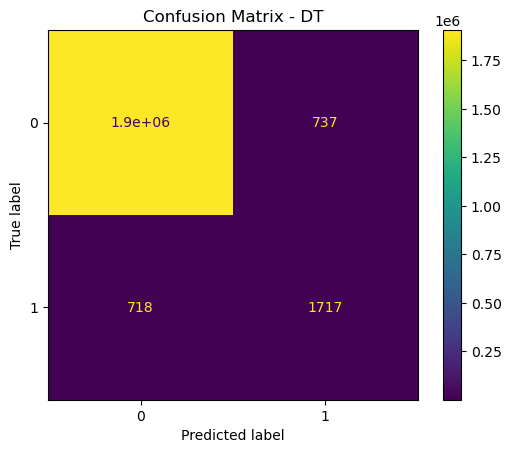

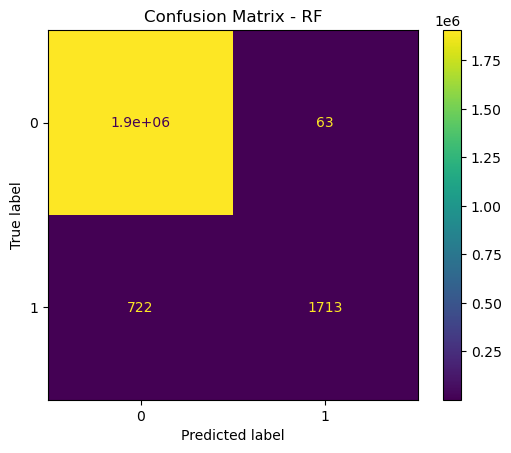

In [27]:
# visualising confusion matrix - DT


disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt)
disp.plot()
plt.title('Confusion Matrix - DT')
plt.show()

# visualising confusion matrix - RF
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf)
disp.plot()
plt.title('Confusion Matrix - RF')
plt.show()

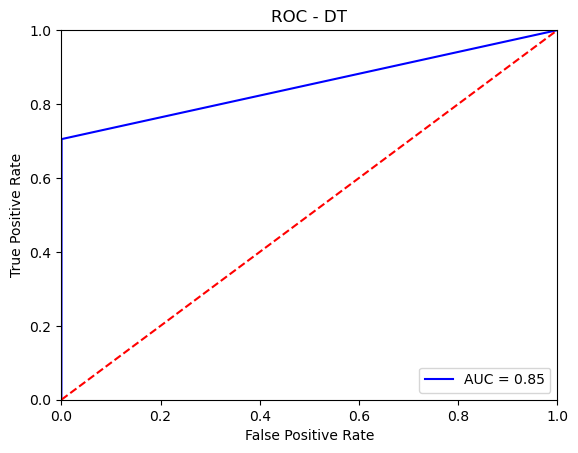

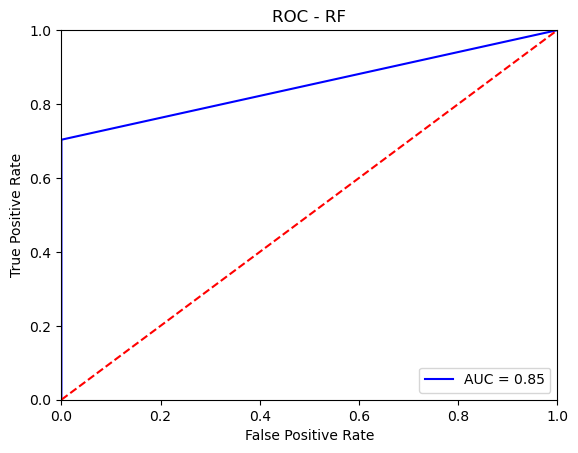

In [28]:
# AUC ROC - DT
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_dt)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - DT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AUC ROC - RF
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_rf)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

THE AUC for both Decision Tree and Random Forest is equal, so both models are pretty good at what they do.

Conclusion

Describe your fraud detection model in elaboration.
In fraud detection scenarios, precision is crucial. It is more important to accurately detect fraudulent transactions than to correctly classify legitimate transactions, as misclassifying a fraudulent transaction as legitimate can have severe consequences.
The dataset is highly imbalanced, with only 0.13% of the transactions being fraudulent. Random Forest and Decision Tree models are well-suited for handling imbalanced data, as they can effectively capture the patterns and decision boundaries, even in the presence of a skewed class distribution.
Decision Tree models are inherently interpretable, as they provide a clear decision path that can be easily understood and explained. Random Forests, being an ensemble of multiple decision trees, also offer decent interpretability by providing feature importance scores and allowing for analysis of the individual decision trees.
Random Forests are known for their robustness to noise and outliers in the data, as they combine the predictions of multiple decision trees, reducing the impact of individual tree errors.
While algorithms like XGBoost, Bagging, Artificial Neural Networks (ANNs), and Logistic Regression may achieve high overall accuracy, they may not perform as well in terms of precision and recall for the minority class (fraudulent transactions) in an imbalanced dataset.

How did you select variables to be included in the model?
By Calculating the Variance Inflation Factor (VIF) to identify multi-collinearity among numerical features.
I Created a correlation heatmap to visualize the correlation between features and the target variable (isFraud).
After that I Dropped one of the highly correlated features with the target variable (isFraud) while retaining the feature that is more correlated with the target.

Demonstrate the performance of the model by using best set of tools. 
To evaluate the model's performance, I will use Confusion matrix which Visualizes true positives, false positives, true negatives, and false negatives.
Also precision and F1 score to Evaluate the model's ability to correctly identify fraudulent and non-fraudulent transactions, considering the class imbalance.
Area Under the Precision-Recall Curve (AU-PRC) which Measures the trade-off between precision and recall, which is more informative for imbalanced datasets compared to AU-ROC.

What are the key factors that predict fraudulent customer?
1. The source of request (secured or not): This factor is crucial as fraudulent activities often originate from unsecured or suspicious sources, such as phishing websites or compromised devices.
2. Legitimacy of the organization asking for money: Verifying the authenticity of the requesting entity is essential to prevent falling victim to scams or impersonation attempts.
3. Transaction history of vendors: Monitoring the transaction patterns and history of vendors can help identify unusual or suspicious activities that may indicate fraud.

What kind of prevention should be adopted while company update its infrastructure?
1. Using verified apps and secured websites: This practice reduces the risk of interacting with malicious or compromised platforms, which could lead to data breaches or financial losses.
2. Secured internet connections (VPN): Using a virtual private network (VPN) can protect against man-in-the-middle attacks and unauthorized access to sensitive information.
3. Keeping software and security updates current: Regularly updating software and security patches can help mitigate vulnerabilities that could be exploited by cybercriminals.
4. Ignoring unsolicited calls, SMS, or emails: Being cautious about unsolicited communications can prevent falling victim to social engineering tactics and phishing attempts.
5. Promptly reporting suspicious activities: Contacting the bank immediately upon suspicion of fraud or security compromise can help mitigate potential losses and enable timely investigation and response.
These customer-focused measures complement the model-based approach by addressing the human factor in fraud prevention. While the machine learning model can identify patterns and flag potentially fraudulent transactions, empowering customers with knowledge and best practices can further strengthen the overall fraud prevention strategy.

Assuming these actions have been implemented, how would you determine if they work?
1. Bank sending e-statements: Regular e-statements from the bank can help customers monitor their account activities and detect any unauthorized transactions promptly.
2. Customers keeping track of account activity: Proactive monitoring of account activity by customers can enhance fraud detection and enable timely reporting of suspicious transactions.
3. Maintaining payment logs: Keeping a log of legitimate payments can serve as a reference point for identifying discrepancies and potential fraudulent transactions.
To determine the effectiveness of the implemented measures, both the model's performance metrics and customer feedback should be monitored. Additionally, conducting periodic risk assessments, analyzing fraud case data, and benchmarking against industry standards can provide insights into the strategy's effectiveness and areas for improvement.